# Exercise 1: Regression

### Make sure that you read and fully understand all the guidelines listed below before you proceed with the exercise.

* HW assignments are a significant part of the learning experience in this course and contribute 50% to your final grade. So, make sure to devote the appropriate time to them.
* **Sharing solutions with someone who is not your submitting partner is strictly prohibited**. This includes reading someone else's code or sharing your code / posting it somewhere.
* Appeals regarding submissions that do not follow the guidelines will not be accepted. 


### Guidelines for Programming Exercises:

* Complete the required functions in `hw1.py`. Any modifications to this notebook will not be tested by our automated tests.
* Write **efficient**, **vectorized** code whenever possible. Some calculations in this exercise can take several minutes when implemented efficiently, but will take much longer otherwise. Unnecessary loops will result in point deductions.
* You are responsible for the correctness of your code. You can add tests to this jupyter notebook to validate your solution. The contents of this jupyter notebook will not be graded or checked.
* You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/), numpy and pandas only. **Do not import anything else.**
* Use `numpy` version 1.15.4 or higher.
* Your code must run without errors. Code that cannot run will not be graded.
* Your code will be tested using automated scripts. So, failure to follow the instructions may lead to test failure, which might significantly affect your grade. 


### Guidlines for Theoretical Exercises
* Your solution should be written or typed and submitted in a separate file `hw1.pdf`.
* If you scan a handwritten solution, make sure that your handwriting is legible and the scan quality is good.
* You are expected to solve the questions analytically and provide a step-by-step solution. 
* It is okay and often recommended to use python to carry out the computations. 
* You may use the lecture slides and previous homework assignments as references, unless explicitly asked to prove a result from class. 

### Submission Guidelines:
* Submit your solutiuon in a zip file that contains: 
  - The `hw1.py` script with your solution to the progamming exercise
  - This notebook with your added tests (this is not checked or graded)
  - The `hw1.pdf` file with your solution to the theoretical exercises.
  
* The name of the zip file should contain your ID(s). For example, `hw1_123456789_987654321.zip` if you submitted in pairs and `hw1_123456789.zip` if you submitted the exercise alone.
* Please use **only a zip** file in your submission.

---
---

## Please sign that you have read and understood the instructions: 

### 207253899 & 211482559

---
---

# Part 1: Theoretical Exercises (16 points)

We have the following data:
$$
\begin{array}{c|c}
x & y \\
\hline
-1 & -1 \\
-1 & 1 \\
1 & 2 \\
2 & 3 \\
\end{array}
$$
1. We would like to fit a linear regression model to this data for the purpose of predicting future values of $y$ from $x$.
    - Write the data matrix $X$ for this regression. Make sure to include the bias term.
    - Write the pseudo inverse $X^\dagger$ of $X$.
    - Use $X^\dagger$ to find the vector $\theta^* \in \mathbb R^2$ that minimizes the sum of squares loss:
    $$
    J(\theta) = \sum_{i=1}^n \left( \theta^\top (1,x^{(i)}) - y^{(i)}  \right)^2
    $$
    - Compute the minimum loss $J(\theta^*)$.
2. Confirm that this is the minimum loss using calculus.
    - Exprss the loss in the form
    $   J(\theta) = A \theta_0^2 + B \theta_1 \theta_0 + C \theta_1^2 + D \theta_0 + E \theta_1 + F$,
      for some $A$, $B$, $C$, $D$, $E$, and $F$ that depend on $x$ and $y$.
    - Find an expression for the gradient $\nabla J(\theta) \in \mathbb R^2$ for aritrary $\theta \in \mathbb R^2$.  
    - Show that $\nabla J(\theta^*) = 0$.
3. Consider the prediction of $y$ at a test point $x=1.5$. 
    - What is the predicted value of $y$ at this point based on linear regression with $\theta^*$?
    - What is the predicted value of $y$ at this point based on K-NN with $K=2$?

# Part 2: Coding Assignment (84 points)

In [1]:
import numpy as np  # used for scientific computing
import pandas as pd  # used for data analysis and manipulation
import matplotlib.pyplot as plt  # used for visualization and plotting

np.random.seed(42)

# make the notebook automatically reload external python modules

## 1. Data Loading, Exploration, and Preprocessing (10 points)

For the following exercise, we will use a dataset containing housing prices in King County. The dataset contains 5,000 observations with 18 features and a single target value - the house price. 

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [2]:
# Read comma separated data
df = pd.read_csv('data.csv')
# df stands for dataframe, which is the default format for datasets in pandas

### Data Exploration
A good practice in data-oriented projects is to explore and characterize general properties of the data. Start by looking at the top of the dataset using the `df.head()` command. This will be the first indication that you read your data properly, and that the headers are correct. Next, you can use `df.describe()` to show statistics on the data and check for trends and irregularities.

In [3]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.000000e+03,5.000000e+03,5000.0000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,4.630823e+09,5.394699e+05,3.3714,2.062150,2061.036800,1.615893e+04,1.432600,0.009400,0.243000,3.455000,7.595200,1753.151000,1966.660800,95.052800,98078.812600,47.559312,-122.215864,1976.84520,13451.164600
std,2.870890e+09,3.873115e+05,0.9104,0.773592,923.727509,4.600220e+04,0.510793,0.096506,0.774643,0.677692,1.166537,818.390844,28.286855,425.234932,54.126332,0.139521,0.141807,674.73601,26514.749009
min,1.000102e+06,7.500000e+04,0.0000,0.000000,380.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.00000,660.000000
25%,2.154075e+09,3.179062e+05,3.0000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1949.000000,0.000000,98033.000000,47.463675,-122.329000,1490.00000,5391.500000
50%,4.022900e+09,4.490000e+05,3.0000,2.000000,1890.000000,7.875000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,1968.000000,0.000000,98070.000000,47.572850,-122.235000,1820.00000,7800.000000
75%,7.345078e+09,6.500000e+05,4.0000,2.500000,2500.000000,1.123400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,1990.000000,0.000000,98118.000000,47.679200,-122.129000,2340.00000,10469.250000
max,9.842300e+09,7.060000e+06,9.0000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7680.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.00000,434728.000000


We will start with simple linear regression with one feature by extracting the target column (`price`) and the first feature (`sqft_living`) from the dataset. We use pandas and select both columns as separate variables and transform them into a numpy array.

In [5]:
X = df['sqft_living'].values
y = df['price'].values

### Normalization

As the number of features grows, calculating gradients gets computationally expensive. We can speed this up by normalizing the input data to ensure all values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes. Use [Standardization](https://en.wikipedia.org/wiki/Feature_scaling) for the fearures (`X`) and the true labels (`y`). 

Please note that normalization is not always necessary or a good idea. For example, normalization may not be a good idea for datasets with outliers.

Implement Standartization transformation:
$$
x'_i = \frac{x_i - \bar{x}}{\sigma},\qquad \bar{x} = \frac{1}{n} \sum_{i=1}^n x_i, \quad \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2}
$$
(here $x = (x_1, x_2, \dots, x_n)$ is a sequence of values)
This transformation is applied to each feature independently, as well as to the target variable.

Your implementation should not contain loops.

---
Complete the function `preprocess` in `hw1.py`

In [6]:
from hw1 import preprocess

X, y = preprocess(X, y)
X.shape, y.shape

((5000,), (5000,))

### Train/Test Split

We partition the data into two random parts: 
1. The training dataset will contain 80% of the data and will be used for model training.
2. The validation dataset will contain the remaining 20% of the data and will be used for model evaluation.

Testing a model on a dataset that was not used for training provides reliable evaluation of our model's expected performance on unseen instances.

In [7]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8 * X.shape[0])], indices[int(0.8 * X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]

### Data Visualization
Another useful concept is data visualization. The code below plots the target value (`price`) against the first feature (`sqft_living`). Since we are currently considering just one feature, we can visualize its relation to the target value using a two-dimensional scatterplot. Once we consider more than two features, visualization becomes much more complicated. We will be using `matplotlib` for all data visualization purposes since it offers a wide range of visualization tools and is easy to use.

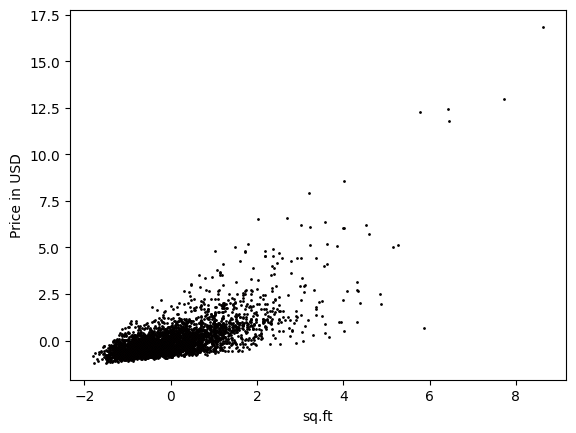

In [8]:
plt.plot(X_train, y_train, 'ro', ms=1,
         mec='k')  # the parameters control the size, shape and color of the scatter plot
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.show()

### Bias/Intercept Consideration

Recall that linear regression contains a bias/intercept parameter, $\theta_0$:

$$
\hat{y} = \theta^T x = \theta_0 + \theta_1 x_1
$$

Thus, to solve linear regression problems, we need to add an "all-1" column as the 0th column of the feature matrix. Do this for both the training and validation data.

---
Complete the function `apply_bias_trick` in `hw1.py`

In [9]:
from hw1 import apply_bias_trick

X_train = apply_bias_trick(X_train)
X_val = apply_bias_trick(X_val)

X_train.shape, X_val.shape

((4000, 2), (1000, 2))

## 2. The Loss Function (5 points)
Our task is to find the linear function of the first feature (`sqft_living`) that "best explains" the target (or response) variable in our dataset (`price`). Since we are currently considering only one feature, the regression formula is:
$$
\hat{y} = \theta^\top x = \theta_0 + \theta_1 x_1.
$$
The parameter vector of our model is $\theta = (\theta_0, \theta_1)$.

The model that "best explains" the target variable in the training data minimizes the loss function $J$:
$$
J(\theta) = \frac{1}{2n} \sum_{i=1}^{n}(\theta^\top x^{(i)}-y^{(i)})^2.
$$
This loss function is called the *mean squared error* and it is obtained by scaling the *sum of squared errors* loss shown in the lecture by a (constant) factor of $\frac{1}{2n}$. Therefore, the minimizers of these two loss functions are identical. Scaling allows us to compare losses across datasets of different sizes.

---
Complete the function `compute_loss` in `hw1.py`

In [10]:
from hw1 import compute_loss

theta = np.array([-1, 2])
J = compute_loss(X_train, y_train, theta)

## 3. Gradient Descent (15 points)

We now wish to use *gradient descent* to find the $\theta$ that minimizes the loss function $J(\theta)$. We start with an initial guess for $\theta$, and then update it sequentially as follows:
$$
\theta \leftarrow \theta - \eta \nabla J(\theta),
$$
where $\eta$ is the *learning rate*. Note that this is a vector update:
$$
\theta_j \leftarrow \theta_j - \eta \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1),\quad j=0,1.
$$

In linear regresion, the gradient is given by the following formula:
$$
\nabla J(\theta) = \frac{1}{n} \sum_{i=1}^n (\theta^\top x^{(i)}-y^{(i)})x^{(i)}.
$$
Specifically, when considering a single feaute, we get:
$$
\begin{align*}
\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) &= \frac{1}{n} \sum_{i=1}^n (\theta_0 + \theta_1 x_1^{(i)} - y^{(i)}), \\
\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1) &= \frac{1}{n} \sum_{i=1}^n (\theta_0 + \theta_1 x_1^{(i)} - y^{(i)})x_1^{(i)}.
\end{align*}
$$

---
Complete the function `gradient_descent` in `hw1.py`

In [11]:
from hw1 import gradient_descent

np.random.seed(42)
theta = np.random.random(size=2)
iterations = 40000
eta = 0.1
theta, J_history = gradient_descent(X_train, y_train, theta, eta, iterations)

You can monitor the learning process by tracing the loss as training progresses. In the following graph, we visualize the loss as a function of the iterations. This is possible since we are saving the loss value at every iteration in the `J_history` array. This visualization might help you find problems with your code. Notice that we are using a logarithmic scale for the number of iterations.

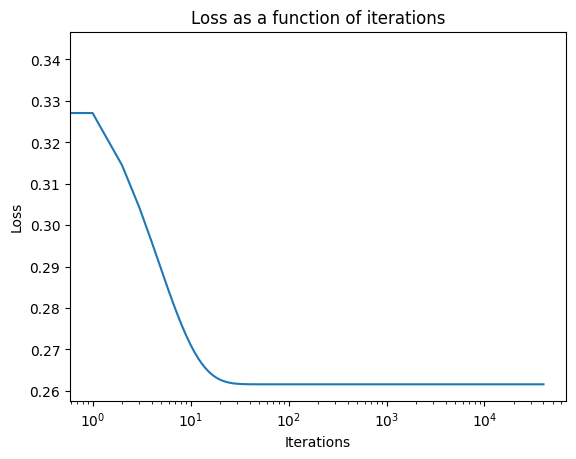

In [12]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.show()

## 4. Analytical Solution to Linear Regression (10 points)

The pseudo inverse method is a direct approach to finding the best-fitting parameters of the linear model. In your implementation, **do not use `np.linalg.pinv`**. Instead, use only direct matrix multiplication as you saw in class (you can calculate the inverse of a matrix using `np.linalg.inv`).

---
Complete the function `compute_pinv` in `hw1.py`

In [13]:
from hw1 import compute_pinv

In [14]:
theta_pinv = compute_pinv(X_train, y_train)
J_pinv = compute_loss(X_train, y_train, theta_pinv)

We can add the loss of the $\theta$ calculated using the psuedo-inverse method to our graph. This provides us with another sanity check, since the loss obtained by gradient descent should converge to the psuedo-inverse loss.

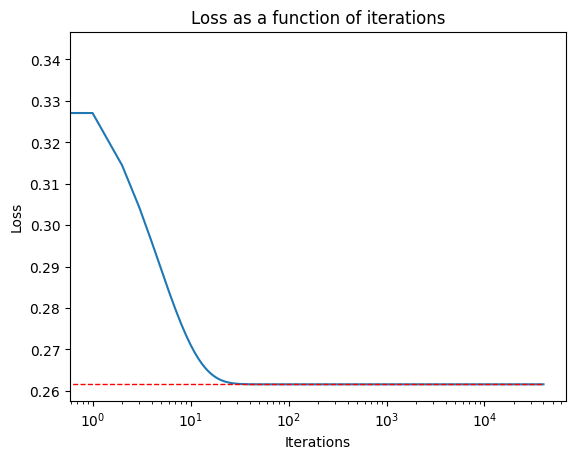

In [15]:
plt.plot(np.arange(len(J_history)), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.hlines(y=J_pinv, xmin=0, xmax=len(J_history), color='r',
           linewidth=1, linestyle='dashed')
plt.show()

## 5. Tuning The Learning rate (5 points)

The learning rate is another factor that determines the performance of optimization algorithms. It may affect performance in several ways:
1. If the learning rate is too high, the algorithm may diverge (see example in the lecture).
2. If the learning rate is too low, the algorithm may converge very slowly and bloat the runtime.
3. In non-convex optimization problems like neural network optimization (not in this course), the learning rate may not only change the speed of convergence but also the convergence point and thus the quality of the learned parameters.

In the case of linear regression, unless the learning rate is very high and leads to divergence, it should only affect the convergence rate and not the convergence point. 

We will check several learning rates and choose the ones the attain minimum loss after a fixed number of iterations. 

Complete the function `find_best_learning_rate`. Use the training dataset to learn the parameters ($\theta$), and use the **validation dataset** to compute the loss associated with these parameters.

---
Complete the function `find_best_learning_rate` in `hw1.py`

## 6. Adding A Halting Condition to The Gradient Descent (5 points)
Earlier you implemented a function `gradient_descent` that performs a fixed number of iterations. We can use a better approach for the implementation of `gradient_descent`. Instead of performing a constant number of iterations, we wish to stop when the improvement of the loss btween two consecutive iterations is smaller than $\epsilon$=`1e-8`. 

---
Complete the function `gradient_descent_stop_condition` in `hw1.py`

**In the remaining parts of this assignment, use the function `gradient_descent_stop_condition` with the best learning rate you computed above.**

In [16]:
from hw1 import gradient_descent_stop_condition, find_best_learning_rate

In [17]:
eta_dict = find_best_learning_rate(X_train, y_train, X_val, y_val, 40000)

/Users/gstrauss/.pyenv/versions/jupyter/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/gstrauss/Reichman_University/machine-learning-from-data/hw1/hw1.py:61: RuntimeWarning: overflow encountered in square
  J = 1 / (2 * X.shape[0]) * np.sum((np.sum(theta * X, axis=1) - y) ** 2)
/Users/gstrauss/.pyenv/versions/jupyter/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/gstrauss/Reichman_University/machine-learning-from-data/hw1/hw1.py:91: RuntimeWarning: invalid value encountered in subtract
  theta -= eta * gardient


We can now obtain the best learning rate from the dictionary `eta_dict` in a single line.

In [18]:
best_learning_rate = min(eta_dict, key=eta_dict.get)
print(best_learning_rate)

0.003


The following code gets the best three learning rates you just calculated and provides a graph with three lines indicating the training loss as a function of iterations. Use it as a test for your implementation. You can change this code as you see fit.

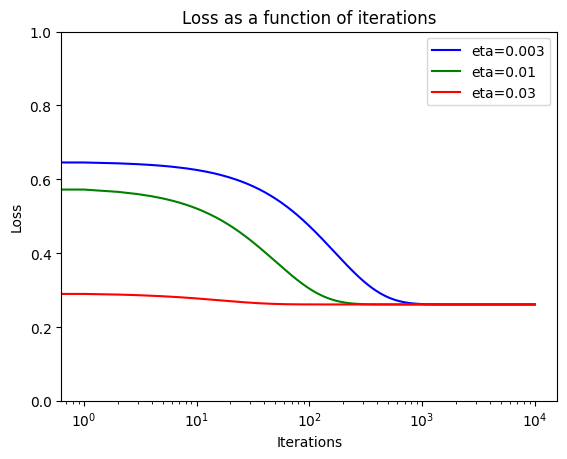

In [19]:
top_3_etas = sorted([(value, key) for key, value in eta_dict.items()], reverse=False)[
             :3]
top_3_etas = [x[1] for x in top_3_etas]

histories = []
for eta in top_3_etas:
    params = np.random.random(size=2)
    _, J_history = gradient_descent(X_train, y_train, params, eta, num_iters=10000)
    histories.append(J_history)

for i, (eta, color) in enumerate(zip(top_3_etas, ['b', 'g', 'r'])):
    plt.plot(np.arange(10000), histories[i], color, label='eta=' + str(eta))


plt.xscale('log')
plt.ylim(0, 1)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.legend()
plt.show()


The function below plots the regression lines of the models you obtained via gradient descent and the pseudoinverse method. Use this to check your solution, as both models should exhibit similar trends. 

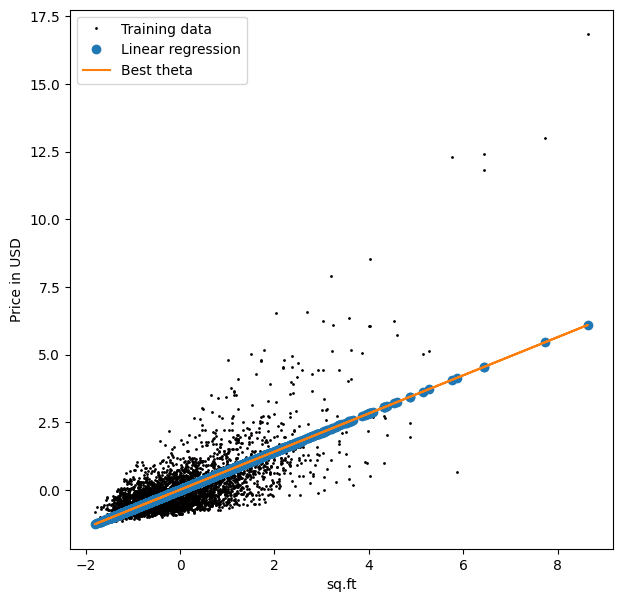

In [20]:
plt.figure(figsize=(7, 7))
plt.plot(X_train[:, 1], y_train, 'ro', ms=1, mec='k')
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.plot(X_train[:, 1], np.dot(X_train, theta), 'o')
plt.plot(X_train[:, 1], np.dot(X_train, theta_pinv), '-')

plt.legend(['Training data', 'Linear regression', 'Best theta']);

## 7. Generalizing to Multiple Features (10 points)

Most datasets have more than one feature, and some might have thousands of features. In those cases, we use a multivariate linear regression model. The regression equation is similar to that of simple linear regression equation:

$$
\hat{y} = \theta^T x = \theta_0 + \theta_1 x_1 + ... + \theta_p x_p
$$

If you wrote proper vectorized code, this part should be trivial and work without changes. If this is not the case, you should go back and edit your functions such that they support both multivariate and single variable regression. **Make sure to allow for an arbitrary number of features and your code should not explicitly check the dimensionality of the input**. 

In [21]:
# Read comma separated data
df = pd.read_csv('data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


### Preprocessing

Like in the single variable case, we need to create a numpy array from the dataframe. Before doing so, we should notice that some of the features are clearly irrelevant so we will go ahead and drop them.

In [22]:
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

Use the same `preprocess` function you implemented previously. Notice that proper vectorized implementation should work regardless of the dimensionality of the input. You might want to check that your code in the previous parts still works.

In [23]:
# preprocessing
X, y = preprocess(X, y)

In [24]:
# training and validation split 
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8 * X.shape[0])], indices[int(0.8 * X.shape[0]):]
X_train, X_val = X[idx_train, :], X[idx_val, :]
y_train, y_val = y[idx_train], y[idx_val]

### Data Visualization

Using 3D visualization, we can still observe trends in the data. Visualizing additional dimensions requires advanced techniques we will learn later in the course.

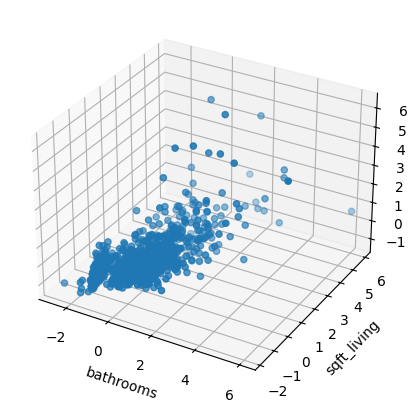

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure
fig = plt.figure(figsize=(5, 5))

# Create 3D axes 
ax = fig.add_subplot(111, projection='3d')

# Plot data
xx = X_train[:, 1][:1000]
yy = X_train[:, 2][:1000]
zz = y_train[:1000]
ax.scatter(xx, yy, zz, marker='o')

# Set labels
ax.set_xlabel('bathrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')

plt.show()


### Data Analysis

Make sure the functions `apply_bias_trick`, `compute_loss`, `gradient_descent`, `gradient_descent_stop_condition` and `compute_pinv` work on the multi-dimensional dataset. If you make any changes, make sure your code still works on the simple regression of Part 2. 

In [26]:
# bias trick
X_train = apply_bias_trick(X_train)
X_val = apply_bias_trick(X_val)

X_train.shape, X_val.shape

((4000, 18), (1000, 18))

In [27]:
# calculating the loss
shape = X_train.shape[1]
theta = np.ones(shape)
J = compute_loss(X_train, y_train, theta)

In [28]:
# running the efficient version of gradient descent
np.random.seed(42)
shape = X_train.shape[1]
theta = np.random.random(shape)
iterations = 40000
theta, J_history = gradient_descent_stop_condition(X_train, y_train, theta,
                                                   best_learning_rate, iterations)

In [29]:
# calculating the pseudoinverse
theta_pinv = compute_pinv(X_train, y_train)
J_pinv = compute_loss(X_train, y_train, theta_pinv)

The code below plots the progression of the gradient descent. Use this to validate your code. Notice we use logarithmic scale for the number of iterations.

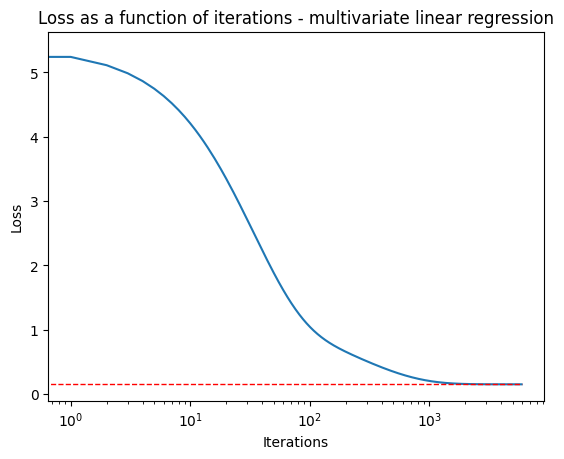

In [30]:
plt.plot(np.arange(len(J_history)), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations - multivariate linear regression')
plt.hlines(y=J_pinv, xmin=0, xmax=len(J_history), color='r',
           linewidth=1, linestyle='dashed')
plt.show()

## 8. Forward feature selection (12 points)

Adding features to a regression model makes it more complicated and potentially more powerful, but it does not necessarily improve its performance. Forward feature selection is a greedy, iterative algorithm used to select the most informative features for a predictive model. This algorithm iteratively adds the feature that obtains the best prediction of the target value in the validation data. 

Implement forward feature selection using the following guidelines: 
1. Start with an empty set of model features $M\leftarrow\emptyset$.
1. For each feature $j\notin M$, do the following:
    - Use the training data to train a linear regression model using the features in $M\cup\{j\}$
    - Evaluate this model's performance by calculating its loss on the validation data.
1. Choose the feature, $j^*$, which provides the best model performance above and add it to the set of model features: $M\leftarrow M\cup\{j^*\}$.
1. Repeat steps 2-3 until you have five features (not including the bias parameter).

---
Open `hw1.py` and complete the function `forward_feature_selection`.

**Note that you should use the inputs as provided in the code below. Do not forget to add the bias parameter inside `forward_feature_selection`**.

In [31]:
df = pd.read_csv('data.csv')
feature_names = df.drop(columns=['price', 'id', 'date']).columns.values
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

# preprocessing
X, y = preprocess(X, y)

# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8 * X.shape[0])], indices[int(0.8 * X.shape[0]):]
X_train, X_val = X[idx_train, :], X[idx_val, :]
y_train, y_val = y[idx_train], y[idx_val]

In [32]:
from hw1 import forward_feature_selection


In [33]:
ffs = forward_feature_selection(X_train, y_train, X_val, y_val, best_learning_rate,
                                iterations)
for feature in ffs:
    print(feature_names[feature])

sqft_living
lat
waterfront
grade
yr_built


## 9. Polynomial regression (12 points)

Now, we will try to model the target value using a polynomial of degree 2 of the features. Recall that this can be done by applying the algorithms for linear regression on transformed input.

### Transform The Data

Implement a function that takes a data matrix and creates the appropriate feature matrix for solving the degree-2 polynomial regression. The function should take a pandas DataFrame as input and should return a new DataFrame with all relevant composite features. If the input DataFrame has $p$ features, then the returned DataFrame should have $2p+\frac{p(p-1)}{2}$ composite features: all original features, all original features squared, and the product of all feature pairs. The names of composite features in the returned DataFrame should reflect their meaning. Examples: `sqft_lot`, `yr_built^2`, `bedrooms*bathrooms`.

Open `hw1.py` and complete the function `create_square_features`.


In [34]:
from hw1 import create_square_features

In [35]:
df = pd.read_csv('data.csv')

y = df['price'].values
df = df.drop(columns=['price', 'id', 'date'])
df = df.astype('float64')
df_poly = create_square_features(df)
X = df_poly.values
X.shape, y.shape

((5000, 170), (5000,))

In [36]:
# preprocessing
X, y = preprocess(X, y)

In [37]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8 * X.shape[0])], indices[int(0.8 * X.shape[0]):]
X_train, X_val = X[idx_train, :], X[idx_val, :]
y_train, y_val = y[idx_train], y[idx_val]

In [38]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((4000, 170), (1000, 170), (4000,), (1000,))

In [39]:
feature_names = df_poly.columns.values


### Solve The Regression Problem

After you obtain the polynomial dataframe, use forward feature selection to find (and print) the five best composite features.

In [40]:
ffs = forward_feature_selection(X_train, y_train, X_val, y_val, best_learning_rate,
                                iterations)

In [41]:
for feature in ffs:
    print(feature_names[feature])

grade*sqft_living
lat*long
bathrooms*waterfront
yr_built*zipcode
sqft_living*yr_built
